In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib

# generamos 30 muestras con dos características, asociadas a dos clases
X, y = make_blobs(n_samples=80, n_features=2, centers=2, random_state=21,center_box=(0, 10.0))
print(X)
print(y)

[[ 6.35349315e+00  9.69440683e-01]
 [ 8.90804026e+00  3.31064405e+00]
 [ 7.84263115e+00  1.06826998e-01]
 [ 6.40459581e+00 -4.91654103e-01]
 [ 9.67618234e-01  1.46371899e+00]
 [ 8.91849963e+00 -8.33495667e-01]
 [ 2.49804162e+00  5.41099496e+00]
 [ 5.42662945e+00  1.85612952e-01]
 [ 6.84083328e+00  2.11890243e+00]
 [ 6.05479977e+00  9.04075210e-01]
 [ 7.83930005e-01  3.11184998e+00]
 [ 5.96174302e+00  1.31475201e+00]
 [-7.88207051e-01  2.95510103e+00]
 [ 6.39479752e-02  4.73671171e+00]
 [ 6.05400902e+00 -7.97975810e-03]
 [ 6.51572767e+00  2.81897578e+00]
 [ 2.29381578e-01  3.17614241e+00]
 [ 1.55547196e+00  1.69655323e+00]
 [ 1.52904561e+00  1.63435730e+00]
 [ 6.64177538e+00 -7.89946766e-01]
 [ 5.14203547e+00  5.14042810e-01]
 [ 1.40736338e+00  2.33318037e+00]
 [ 7.95807263e+00  8.98796709e-01]
 [ 8.28639230e+00 -4.86806185e-01]
 [ 1.23263649e+00  1.18004284e+00]
 [ 8.86852485e+00  4.82448030e-01]
 [-5.74607810e-01  1.90172820e+00]
 [-9.89193314e-01  3.12289956e+00]
 [ 8.72629824e+00 -1

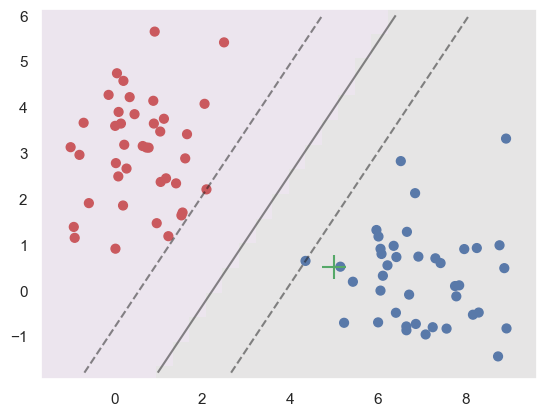

In [10]:

# Creamos el modelo SVM para clasificación con kernel lineal y entrenamos el modelo
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)

# Graficamos los datos en el espacio de caracteríticas
cmap   = matplotlib.colors.ListedColormap( [ 'r', 'b' ] )
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,cmap=cmap)

#  Creamos un mesh para evaluar la función de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Graficamos el hiperplano y el margen
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

# Graficamos los vectores soporte
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', edgecolors='k')
Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)

cmap   = matplotlib.colors.ListedColormap( [ 'pink', 'y' ] )
plt.pcolormesh(XX, YY, Z_pred,cmap = cmap,alpha=0.1)

new_x = [[5,0.5]]
new_z = clf.predict(new_x)
if new_z[0]==0: color='k'
else: color='g'
plt.scatter(new_x[0][0],new_x[0][1] , marker = '+',color=color,s=300)
plt.grid()
plt.show()

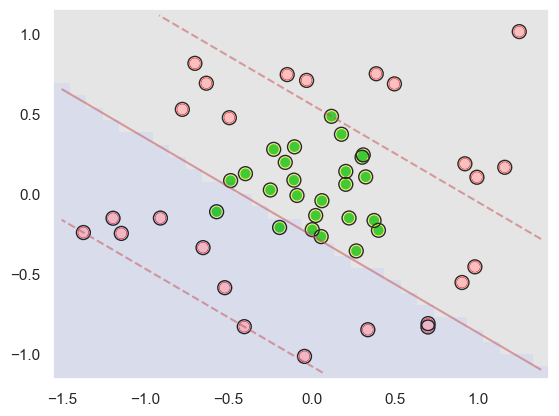

In [15]:
# Veamos el uso de kernels para el problema de clases linealmente no separables
from sklearn.datasets import make_circles

# generamos 100 muestras con dos características, asociadas a dos clases
X, y = make_circles(50, factor=.2, noise=.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Creamos el modelo SVM para clasificación con kernel lineal/rbf y entrenamos el modelo
clf = svm.SVC(kernel='linear', C=100).fit(X, y)

# Graficamos los datos en el espacio de caracteríticas
cmap   = matplotlib.colors.ListedColormap( [ 'pink', 'limegreen' ] )
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,cmap=cmap)

#  Creamos un mesh para evaluar la función de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Graficamos el hiperplano y el margen
ax.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

# Graficamos los vectores soporte
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', edgecolors='k')

Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)

cmap   = matplotlib.colors.ListedColormap( [ 'b', 'y' ] )
plt.pcolormesh(XX, YY, Z_pred,cmap = cmap,alpha=0.1)

plt.grid()
plt.show()

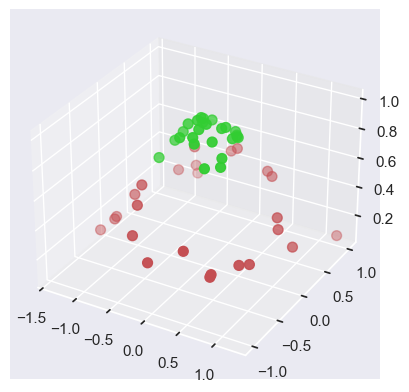

In [16]:
# Veamos el efecto del truco kernel (aumentando la dimensionalidad del espacio de entradas)
from mpl_toolkits import mplot3d

# Aplicamos una operación de kernel gaussiano para separar las clases
# Gamma controla el efecto del kernel, si es muy pequeño el modelo se parece al lineal
gamma = 1
Xr = np.exp(-gamma*(X ** 2).sum(1))

# Graficamos el espacio de características mapeado por el kernel
ax = plt.subplot(projection='3d')
cmap   = matplotlib.colors.ListedColormap( [ 'r', 'limegreen' ] )
ax.scatter3D(X[:, 0], X[:, 1], Xr, c=y, s=50, cmap=cmap)

## Parte 2. Dataset digits

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.datasets import load_digits

# cargamos el dataset
digits = load_digits()
digits.data.shape

(1797, 64)

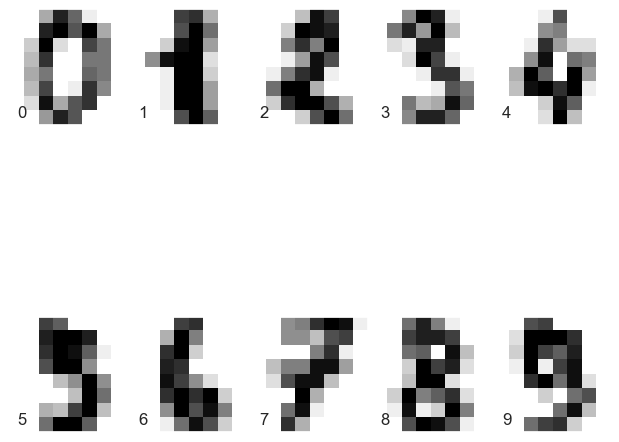

In [21]:
# Mostramos los digitos en imágenes
fig = plt.figure(figsize=(6, 6))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

In [22]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=0)

In [23]:
# Definimos la configuración del clasificador
from sklearn import datasets, svm, metrics
clf = svm.SVC(kernel='rbf')

In [24]:
# Entrenamos el clasificador con los datos de entrenamiento
clf.fit(Xtrain, ytrain)

SVC()

# predicción

0.9911111111111112


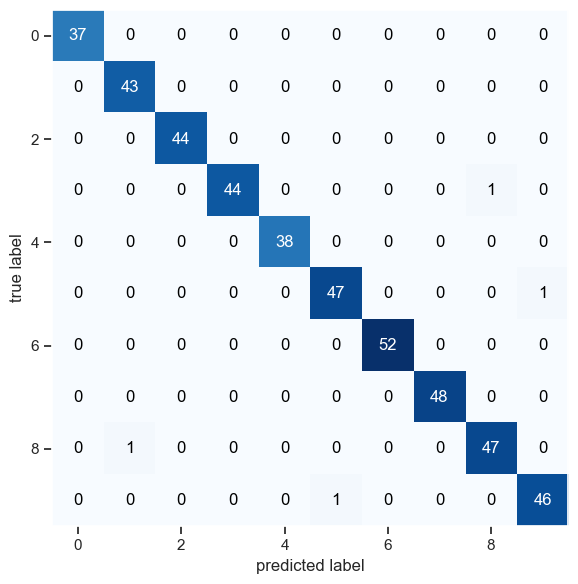

In [25]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

score = clf.score(Xtest, ytest)
print(score)

ypred = clf.predict(Xtest)
matriz = confusion_matrix(ytest,ypred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()